# Chapter 7: Bootstrap Confidence Intervals

| Chapter  | Colab   | Kaggle          | Gradient      | Studio Lab             |
|:---------|:--------|:----------------|:--------------|:-----------------------|
| [Chapter 7: Bootstrap Confidence Intervals](7_from_theory_to_practice/Chapter_7_Bootstrapping_Code_sample.ipynb)               | [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/matthew-mcateer/practicing_trustworthy_machine_learning/blob/main/7_from_theory_to_practice/Chapter_7_Bootstrapping_Code_sample.ipynb)          | [![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/matthew-mcateer/practicing_trustworthy_machine_learning/blob/main/7_from_theory_to_practice/Chapter_7_Bootstrapping_Code_sample.ipynb)          | [![Gradient](https://assets.paperspace.io/img/gradient-badge.svg)](https://console.paperspace.com/github/matthew-mcateer/practicing_trustworthy_machine_learning/blob/main/7_from_theory_to_practice/Chapter_7_Bootstrapping_Code_sample.ipynb)          | [![Open In SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/matthew-mcateer/practicing_trustworthy_machine_learning/blob/main/7_from_theory_to_practice/Chapter_7_Bootstrapping_Code_sample.ipynb)          |


In [2]:
#@title Installing dependencies { display-mode: "form" }
!pip -qq install watermark numpy seaborn pandas scikit-learn
%load_ext watermark
%watermark -a "Practicing Trustworthy machine Learning" -u -d -v -m -p numpy,seaborn,pandas,sklearn

Author: Practicing Trustworthy machine Learning

Last updated: 2022-11-27

Python implementation: CPython
Python version       : 3.7.12
IPython version      : 7.33.0

numpy  : 1.21.6
seaborn: 0.11.2
pandas : 1.3.5
sklearn: 0.0

Compiler    : GCC 9.4.0
OS          : Linux
Release     : 5.15.65+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit



Simple lines of python for granting intuition for confidence intervals.

![](https://github.com/matthew-mcateer/practicing_trustworthy_machine_learning/raw/main/images/sampling_probability.png)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns 

from numpy.random import randn, randint
from numpy.random import seed

#@markdown random number seed
random_number_seed = 1 #@param
seed(1)

#@markdown Number of samples
sample_size = 100 #@param
x = 20 * (2.5 + randn(sample_size)) 
y = x + (10 * randn(sample_size) + 50)

df = pd.DataFrame(
    {
        'x': x.tolist(),
        'y': y.tolist()
    }
)

df["val"] = "red"

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


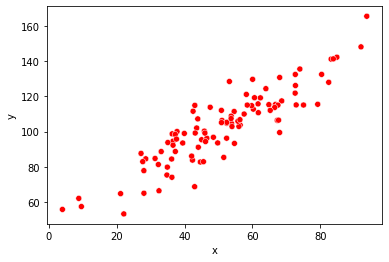

In [4]:
sns.scatterplot(df["x"], df["y"], c=df["val"]).plot();

In [6]:
#@title simple linear regression model

from sklearn.utils import resample
from sklearn.linear_model import LinearRegression

coefficients = []
intercepts = []
for _ in range(1000):
    idx = randint(0, sample_size, sample_size)
    x_train = x[idx]
    y_train = y[idx]

    model = LinearRegression().fit(
        np.expand_dims(x_train, axis=1), np.expand_dims(y_train, axis=1)
    )

    coefficients.append(model.coef_.item())
    intercepts.append(model.intercept_)


In [7]:
upper_coefficient = np.percentile(coefficients, 97.5)
upper_intercept = np.percentile(intercepts, 97.5)
lower_coefficient = np.percentile(coefficients, 2.5)
lower_intercept = np.percentile(intercepts, 2.5)

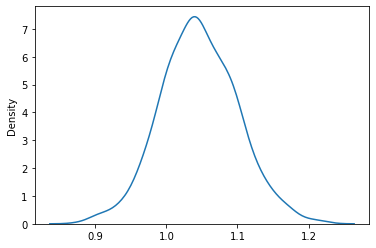

In [8]:
sns.kdeplot(coefficients, cumulative=False);

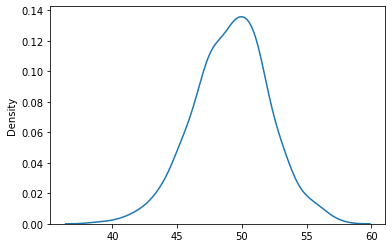

In [9]:
sns.kdeplot(np.squeeze(intercepts), cumulative=False);